# image load

In [1]:
import numpy as np
import cv2
from skimage import data

In [3]:
cat_rgb = data.chelsea() # take the test image of cat!
cat_gray = cv2.cvtColor(cat_rgb,cv2.COLOR_RGB2GRAY)

print(f"ndim:{cat_rgb.ndim},shape:{cat_rgb.shape},dtype:{cat_rgb.dtype},itemsize:{cat_rgb.itemsize}")
print(f"ndim:{cat_gray.ndim},shape:{cat_gray.shape},dtype:{cat_gray.dtype},itemsize:{cat_gray.itemsize}")

ndim:3,shape:(300, 451, 3),dtype:uint8,itemsize:1
ndim:2,shape:(300, 451),dtype:uint8,itemsize:1


# 이미지 옆에 붙이기

In [4]:
cat_hstack = np.hstack( (cat_rgb,cat_rgb) )
print(cat_hstack.shape)

(300, 902, 3)


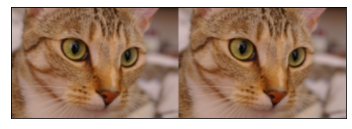

In [6]:
import matplotlib.pyplot as plt

plt.imshow(cat_hstack, interpolation='bicubic')
plt.xticks([]); plt.yticks([])
plt.show()

# 이미지 위아래로 붙이기

In [7]:
cat_vstack = np.vstack( (cat_rgb,cat_rgb))
print(cat_vstack.shape)

(600, 451, 3)


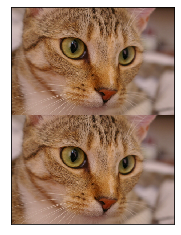

In [8]:
plt.imshow(cat_vstack, interpolation='nearest')
plt.xticks([]),plt.yticks([])
plt.show()

# 축을 지정하여 붙이기.

`np.concatenate(ndarrays' tuple, axis=0)`

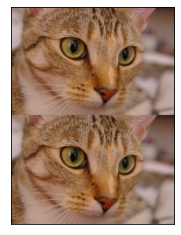

In [9]:
r = np.concatenate( (cat_rgb,cat_rgb) , axis=0 )
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()

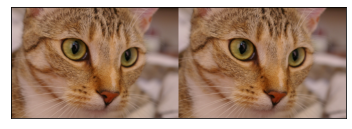

In [10]:
r = np.concatenate( (cat_rgb,cat_rgb) , axis=1 )
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()

In [22]:
r = np.concatenate( (cat_rgb,cat_rgb) , axis=2 )
print(r.shape)
'''
plt.imshow(r[:,::2])
plt.xticks([]),plt.yticks([])
plt.show()
'''
# 6이다 6

(300, 451, 6)


'\nplt.imshow(r[:,::2])\nplt.xticks([]),plt.yticks([])\nplt.show()\n'

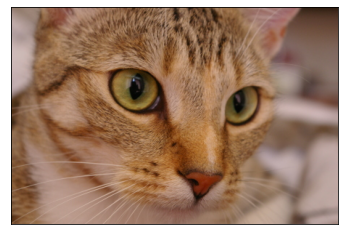

In [25]:
plt.imshow(r[:,:,3:])
plt.xticks([]),plt.yticks([])
plt.show()

# 새로운 축으로 병합


In [26]:
r = np.stack( (cat_rgb,cat_rgb), axis=0)
print(r.shape)

(2, 300, 451, 3)


In [27]:
r = np.stack( (cat_rgb,cat_rgb), axis=-1)
print(r.shape)

(300, 451, 3, 2)


In [28]:
r = np.stack( (cat_rgb,cat_rgb), axis=1)
print(r.shape)

(300, 2, 451, 3)


(300, 451)
(300, 451, 3)


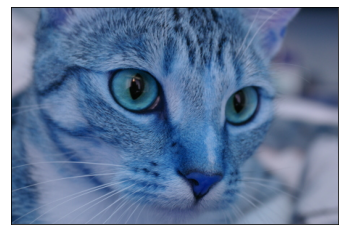

In [29]:
print(cat_rgb[:,:,2].shape)
r = np.stack( (cat_rgb[:,:,2],cat_rgb[:,:,1],cat_rgb[:,:,0]) , axis=2 )
print(r.shape)

plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()


# 수평으로 분리하기

In [30]:
img_hsplit= np.hsplit(cat_rgb[:,:450,:],3)
print(np.shape(img_hsplit))

(3, 300, 150, 3)


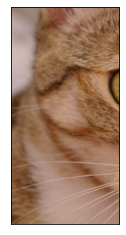

In [31]:
plt.imshow(img_hsplit[0])
plt.xticks([]),plt.yticks([])
plt.show()

In [54]:
img_hsplit= np.hsplit(cat_rgb[:,:450,:],9)
new = np.zeros((300,50,3), dtype='uint8')
new2 = np.zeros((300,50,3), dtype='uint8')
print(new.dtype)
print(img_hsplit[0].dtype)

uint8
uint8


In [57]:
for i in range(9):
    new = np.hstack((new, img_hsplit[i]))
    new = np.hstack((new, new2))

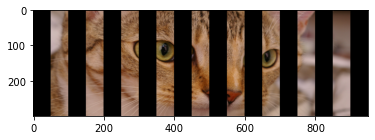

In [58]:
plt.imshow(new)

In [59]:
img_hsplit= np.hsplit(cat_rgb,(200,300,350))
print(len(img_hsplit))

for idx, c in enumerate(img_hsplit):
  print(f"{idx:02d}, {c.shape}")

4
00, (300, 200, 3)
01, (300, 100, 3)
02, (300, 50, 3)
03, (300, 101, 3)


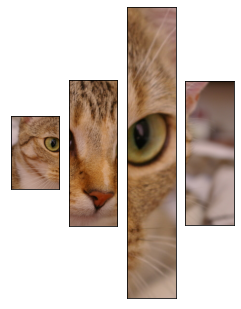

In [60]:
plt.figure(figsize=(4,7))
plt.subplot(1,4,1)
plt.imshow(img_hsplit[0])
plt.xticks([]),plt.yticks([])

plt.subplot(1,4,2)
plt.imshow(img_hsplit[1])
plt.xticks([]),plt.yticks([])

plt.subplot(1,4,3)
plt.imshow(img_hsplit[2])
plt.xticks([]),plt.yticks([])

plt.subplot(1,4,4)
plt.imshow(img_hsplit[3])
plt.xticks([]),plt.yticks([])

plt.show()



# 수직으로 분리하기

In [61]:
img_vsplit = np.vsplit(cat_rgb,2)
print(np.shape(img_vsplit))

(2, 150, 451, 3)


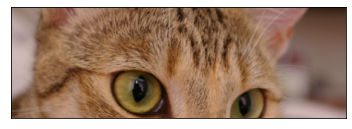

In [62]:
plt.imshow(img_vsplit[0])
plt.xticks([]),plt.yticks([])
plt.show()

# 축을 지정하여 분리

`np.split( ndarrays' tuple, indice tuple, axis=0)`

In [63]:
img_mono = np.split(cat_rgb,3,axis=-1)
print(np.shape(img_mono))

(3, 300, 451, 1)


(300, 451, 1)
(300, 451)


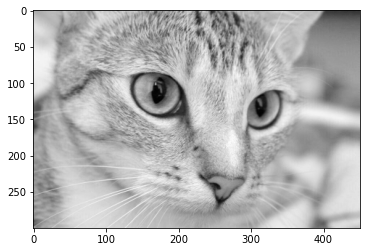

In [64]:
print(img_mono[0].shape)
r = np.squeeze(img_mono[0])
print(r.shape)
plt.imshow(np.squeeze(img_mono[0]),cmap='gray')

(300, 451, 1)
(300, 451)


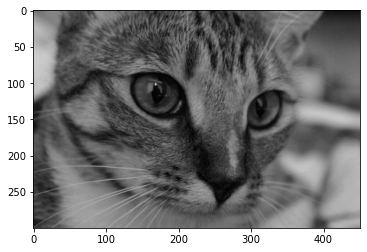

In [65]:
print(img_mono[2].shape)
r = np.squeeze(img_mono[2])
print(r.shape)
plt.imshow(np.squeeze(img_mono[2]),cmap='gray')

# 조건에 의한 indexing

True, False로 구성된 ndarray(or mask)를 통한 **특정 ndarray**에  indexing.


`np.where (조건식, [,True일때 값, False일때 값])`
* 조건식에 해당(조건식이 True인) 인덱스의 tuple or 조건식의 결과에 따라 변경된 값으로 채워진 `ndarray`를 반환.


(300, 451) <class 'numpy.ndarray'>


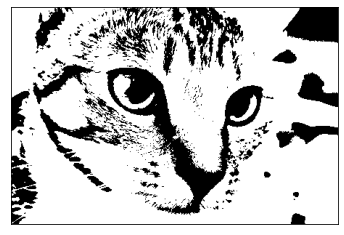

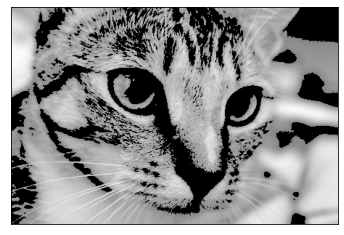

In [66]:
mask = np.where(cat_gray>100,1,0)
print(mask.shape,type(mask))
plt.figure()
plt.imshow(mask,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

r = cat_gray * mask
plt.figure()
plt.imshow(r,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()


In [68]:
mask3 = np.where(cat_gray>100)
# 100을 넘은것만 남는 것 같다.
print(np.shape(mask3))
mask3

(2, 101338)


(array([  0,   0,   0, ..., 299, 299, 299], dtype=int64),
 array([  0,   1,   2, ..., 448, 449, 450], dtype=int64))

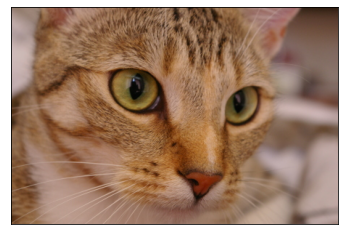

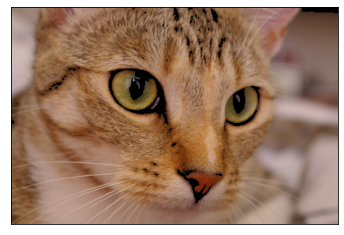

In [69]:
plt.figure()
plt.imshow(cat_rgb)
plt.xticks([]),plt.yticks([])
plt.show()

r = cat_rgb.copy() 
# gray값이 50보다 낮으면 rgb값을 0으로 만들어버려라
r[cat_gray<50] = (0,0,0)
plt.figure()
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()

`np.where( ndarray, 조건식 )`

* 조건식에 해당하는(True인) index를 반환함.
* 차원이 2이상일 경우, 차원수에 해당하는 갯수의 `list`를 반환.

In [70]:
indice = np.where(cat_gray<10)
print(np.shape(indice)) # 293개의 pixel의 인덱스...
r = np.stack( (indice[0],indice[1]),axis=-1)
print(cat_gray[r[0][0],r[0][1]])
r[0:10]

(2, 243)
9


array([[ 91, 188],
       [ 92, 189],
       [ 93, 174],
       [ 94, 174],
       [ 94, 175],
       [ 94, 176],
       [ 95, 174],
       [ 95, 176],
       [ 95, 177],
       [ 96, 176]], dtype=int64)

# 통계적 처리

`np.mean()`, `np.max`, `np.min`

(300, 451, 3)


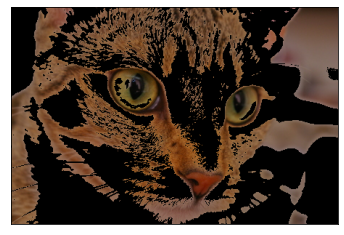

In [77]:
r = cat_rgb.copy()
g_m = np.mean(cat_gray)
r[cat_gray>g_m] = (0,0,0)
print(np.shape(r))
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()

In [71]:
g_m = np.mean(cat_gray)
print(g_m) # 모든 수에 대해 계산됨.

119.48269031781227


In [72]:
rgb_m = np.mean(cat_rgb)
print(rgb_m) # 모든 수에 대해 계산됨.

115.30514166050752


In [73]:
rgb_m = np.mean(cat_rgb, axis=-1)
print(rgb_m.shape) # 모든 채널을 바탕으로..

(300, 451)


In [74]:
rgb_m = np.mean(cat_rgb, axis=0)
print(rgb_m.shape) # axis=0를 바탕으로 평균을 계산. 즉 결과는 column으로 남음.

(451, 3)


# 기타

In [ ]:
a = np.array([1,2,3,4,0,0,4,3,2,1,0])
np.nonzero(a)

(array([0, 1, 2, 3, 6, 7, 8, 9]),)

In [ ]:
np.all([1,1,1])

True

In [78]:
np.all([1,1,2])

True

In [ ]:
np.any([1,1,1])

True

In [ ]:
np.any([1,1,0])

True

In [ ]:
np.any([0,0,0])

False

In [ ]:
a = np.arange(0,10)
b = np.arange(0,10)
c = a #실제적으로 a,b는 같은 객체를 가르키고 있는 별칭관계.

print(id(a))
print(id(b))
print(id(c))

139629294880928
139629294880048
139629294880928


In [ ]:
b[a>5] = 0
b

array([0, 1, 2, 3, 4, 5, 0, 0, 0, 0])

In [ ]:
np.all(a==b)

False

In [ ]:
np.all(a==c)

True

In [ ]:
a is b

False

In [ ]:
a is c

True

In [ ]:
a is a

True

In [ ]:
d = a.copy()
a is d

False

In [ ]:
np.all(a == d)

True